In [2]:
import requests
from PIL import Image

url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

ConnectTimeout: HTTPSConnectionPool(host='fki.tic.heia-fr.ch', port=443): Max retries exceeded with url: /static/img/a01-122-02.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000268F5D59BD0>, 'Connection to fki.tic.heia-fr.ch timed out. (connect timeout=None)'))

In [19]:
image_path = r"C:\Users\lolen\Downloads\download22.png"
image_path = r"C:\Users\lolen\Downloads\Sample-handwritten-text-input-for-OCR.png"
image2 = Image.open(image_path).convert('RGB')


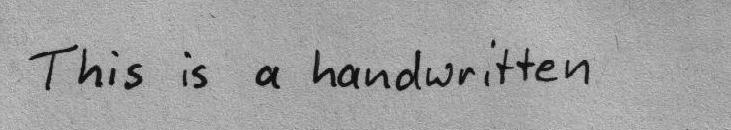

In [20]:
image2

In [5]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")


c:\Users\lolen\anaconda3\envs\fastdoc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'image' is not defined

In [21]:
pixel_values = processor(image2, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 384, 384])


In [7]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

This is a handwritten
